## Load Data

In [1]:
file.name = file.path("./", "shhs1.txt")
data.cv<-read.table(file=file.name,header = TRUE,na.strings="NA")
attach(data.cv)
dim(data.cv)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2457576383.py, line 2)

## Convert Expected Outcomes to Binary Data

In [ ]:
 MtS_SA=rdi4p>=15
 n_positive =sum(MtS_SA)
 n_positive

[1] 1004

## Fit Data Using GLM

In [2]:
fit <- glm(MtS_SA~gender+age_s1+bmi_s1+HTNDerv_s1,family="binomial")
summary(fit)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (969929274.py, line 1)

## Calculate Risk Scores (Predicted Outcomes)

In [ ]:
predictor_rdi4p <- 1.16*gender+0.033*age_s1+0.14*bmi_s1+0.19*HTNDerv_s1

In [ ]:
intuition<-cbind(gender,age_s1,bmi_s1,HTNDerv_s1,rdi4p,MtS_SA,predictor_rdi4p)
round(head(intuition),digits=2)

gender,age_s1,bmi_s1,HTNDerv_s1,rdi4p,MtS_SA,predictor_rdi4p
1,55,21.78,1,1.44,0,6.21
1,78,32.95,1,17.80,1,8.54
0,77,24.11,0,4.85,0,5.92
1,48,20.19,1,0.80,0,5.76
0,66,23.31,1,2.76,0,5.63
1,63,27.15,1,3.72,0,7.23


## Risk Score Distribution

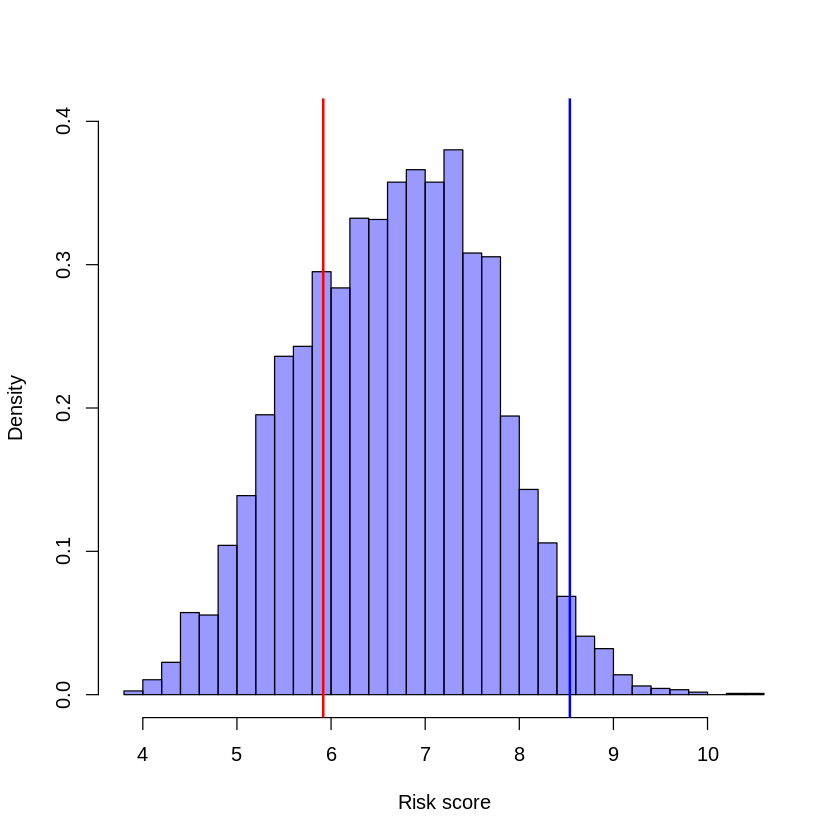

In [54]:
hist(predictor_rdi4p, probability = T, xlab='Risk score', ylab='Density', main='', col=rgb(0, 0, 1, .4), breaks=30, ylim=c(0, .4))
abline(v= predictor_rdi4p[2], col='blue', lwd=2)
abline(v= predictor_rdi4p[3], col='red', lwd=2)

## Correlation Inspection (Linear Relationship)

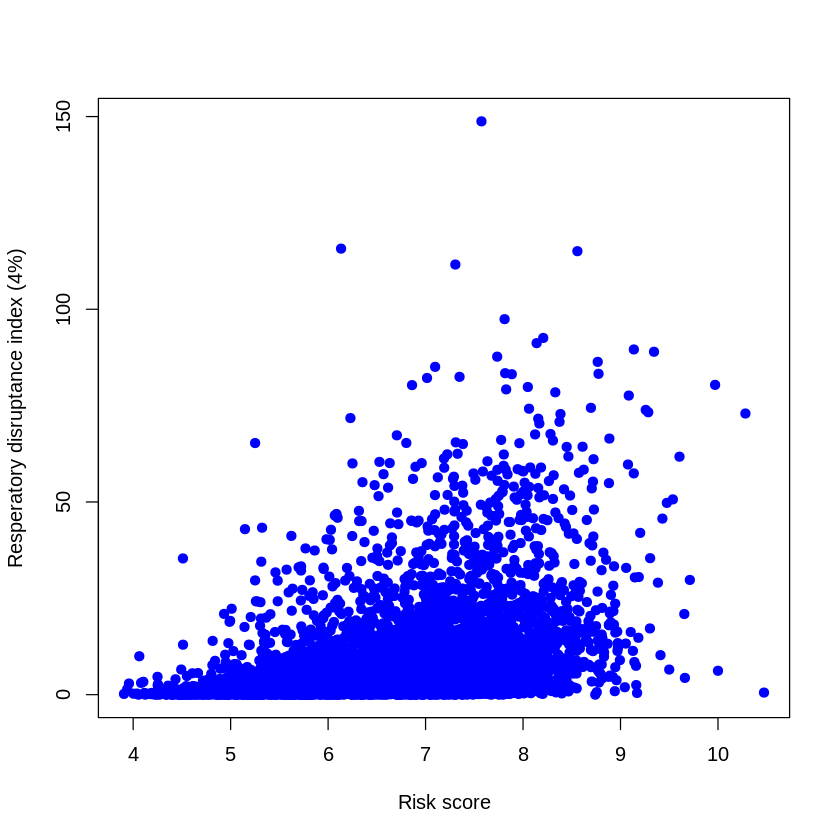

In [ ]:
plot(predictor_rdi4p, rdi4p, pch=19, col='blue', xlab='Risk score', ylab='Resperatory disruptance index (4%)')

## Compare Risk Score Distributions Based On Disease Status

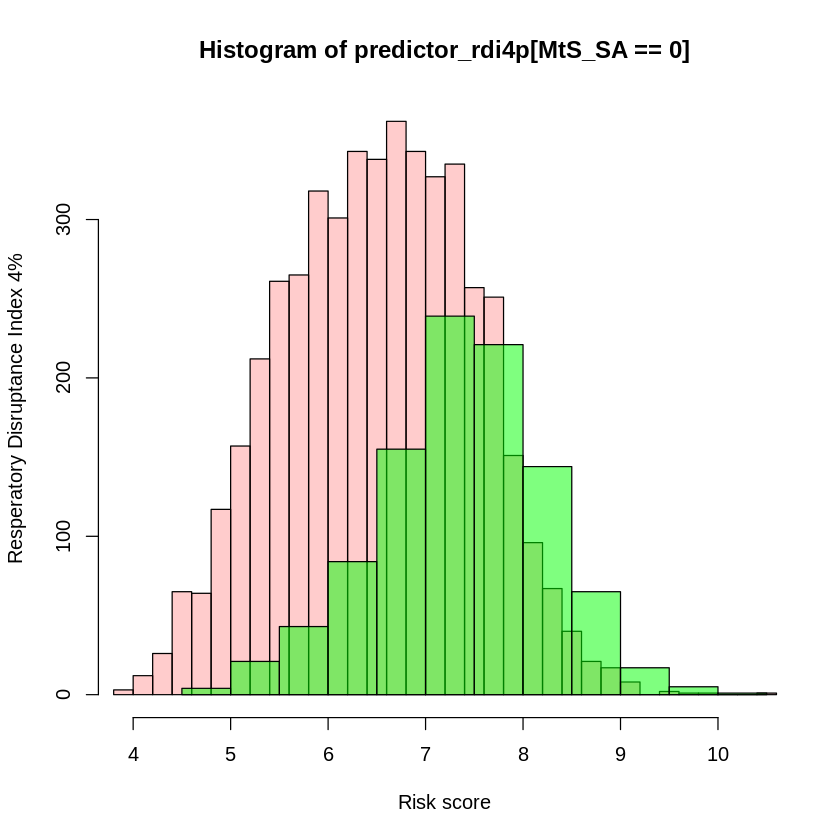

In [62]:
ll = min(predictor_rdi4p, na.rm=T)
ul = max(predictor_rdi4p, na.rm=T)

hist(predictor_rdi4p[MtS_SA == 0], col=rgb(1, 0, 0, .2), breaks=30, xlab='Risk score', ylab='Resperatory Disruptance Index 4%', xlim=c(ll, ul))
hist(predictor_rdi4p[MtS_SA == 1], add=T, col=rgb(0, 1, 0, .5))

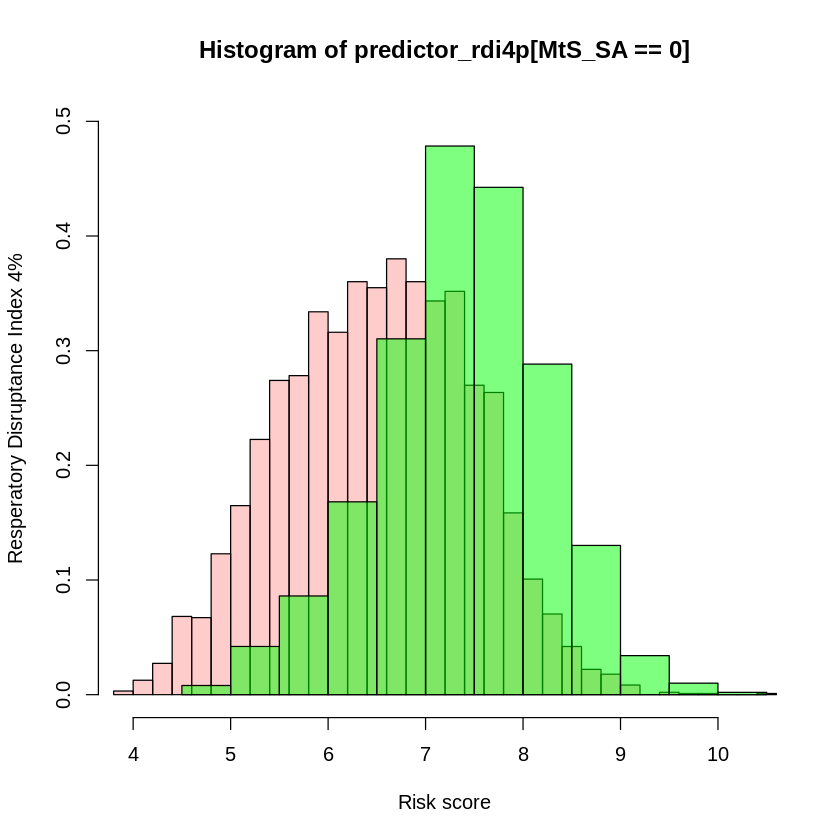

In [64]:
ll = min(predictor_rdi4p, na.rm=T)
ul = max(predictor_rdi4p, na.rm=T)

hist(predictor_rdi4p[MtS_SA == 0], probability = T, col=rgb(1, 0, 0, .2), ylim = c(0, .5), breaks=30, xlab='Risk score', ylab='Resperatory Disruptance Index 4%', xlim=c(ll, ul))
hist(predictor_rdi4p[MtS_SA == 1], probability = T, add=T, col=rgb(0, 1, 0, .5))